# Term Project Milestone 3
# DSC550-T301
# Ryan Krenke
# 8/1/24

## Food Product Fat Level Project

I am choosing to complete this project using data from my day job. I have been working in food safety and quality control in the food manufacturing industry for the last 15 years and, like many corporations, we produce a large amount of data every day. Also like many corporations, we aim to make a profit through the products we sell. While I am always interested in producing products within specifications, I and others in the company are always interested in optimizing certain results that might lead to increased profits, or at least understanding relationships between the results. 

One such group of results that I deal with regularly is finished food product chemical analysis results. All food products have recognized chemical analysis results like fat, moisture, protein, and salt which relate to labeling, quality, and Regulatory requirements, but also mean differences in product costs and profits. This is especially true with fat levels - unsurprisingly, a higher fat product costs less to make, so the profits can be higher if these are controlled and optimized. 

With this in mind, I am designing this project around understanding what factors might lead to different fat results in our finished food products. Specifically, I would like to understand if a model can be developed that best predicts the fat levels, and which variable/s this involves. Ideally, if I can show which variables yield fat levels over a certain percentage or in a certain optimal range, that would be beneficial for predicting future results. 

The dataset I have chosen to use comes from my company's electronic records database and is finished product chemical analysis results for two of our highest volume products from April 2024 through current date. The only adjustments I made up front involved removing facility and personnel names and changing the product names ('Resource') to a shortened code, all in the name of anonymity. 

## Part 1

In [2]:
#importing necessary libraries
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
chemdf = pd.read_csv("C:/Users/ryanr/dsc550/product chemistry.csv") #using read_csv from pd to read in csv file from local drive

In [6]:
chemdf.head(20) #using head function calling for 20 rows

,RecordNumber,Date,Time,Resource,Unnamed: 4,WIP Number,Shift,Julian Date,Pallet Numbers,Moisture %,Protein %,Fat %,MPR,Salt %,pH,aW
0,108900822,4/18/2024,9:33,1544,True,1580,1,NaN,1-7,30.43,18.74,44.23,1.63,4.67,4.50,0.8810
1,108931668,4/18/2024,13:09,1544,True,1580,1,NaN,8-12,29.11,18.14,45.15,1.60,4.10,4.54,0.8809
2,108931877,4/18/2024,13:10,1544,True,1580,1,NaN,13-16,29.32,18.09,44.81,1.62,4.58,4.52,0.8780
3,108989037,4/18/2024,21:11,3318,True,6755,2,NaN,1-5,31.49,19.61,42.00,1.61,3.31,4.69,0.9201
4,108989189,4/18/2024,21:12,3318,True,6755,2,NaN,6-13,30.99,19.00,42.55,1.63,3.61,4.69,0.9004
5,108989373,4/18/2024,21:13,3318,True,6755,2,NaN,14-20,31.62,19.39,42.14,1.63,3.33,4.65,0.8936
6,108989478,4/18/2024,21:14,3318,True,6755,2,NaN,21-24,31.42,19.32,42.06,1.63,3.35,4.69,0.9179
7,109080914,4/19/2024,14:20,1544,True,1580,1,NaN,1-7,29.78,18.33,43.26,1.59,4.36,4.57,0.8895
8,109081060,4/19/2024,14:21,1544,True,1580,1,NaN,8-14,29.82,18.33,44.07,1.63,4.45,4.57,0.8870
9,109081415,4/19/2024,14:24,1544,True,1580,1,NaN,15-20,28.75,18.98,44.97,1.51,4.38,4.56,0.8874


In [7]:
chemdf.shape #using shape to show dimensions of dataframe

(537, 16)

In [8]:
chemdf.describe() #using describe() to show summary statistics

,RecordNumber,Resource,WIP Number,Shift,Moisture %,Protein %,Fat %,MPR,Salt %,pH,aW
count,5.370000e+02,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000
mean,1.134110e+08,1930.513966,2793.495345,1.681564,30.186611,19.044953,43.471359,1.587169,4.133445,4.562894,0.893553
std,2.751709e+06,732.996083,2540.449338,0.466304,0.959836,0.604194,0.958312,0.053621,0.471039,0.094220,0.014225
min,1.089008e+08,1544.000000,580.000000,1.000000,27.390000,18.010000,40.620000,1.290000,2.700000,4.170000,0.865900
25%,1.112136e+08,1544.000000,1580.000000,1.000000,29.570000,18.680000,42.790000,1.560000,4.070000,4.520000,0.883600
50%,1.133679e+08,1544.000000,1580.000000,2.000000,30.290000,18.930000,43.420000,1.600000,4.300000,4.560000,0.890200
75%,1.158875e+08,1544.000000,1580.000000,2.000000,30.830000,19.240000,44.060000,1.630000,4.430000,4.610000,0.900800
max,1.191001e+08,3318.000000,25199.000000,2.000000,32.860000,22.400000,46.090000,1.660000,4.750000,4.960000,0.941200


In [9]:
chemdf.dtypes #using dtypes to show datatypes of dataframe columns

RecordNumber        int64
Date               object
Time               object
Resource            int64
Unnamed: 4           bool
WIP Number          int64
Shift               int64
Julian Date        object
Pallet Numbers     object
Moisture %        float64
Protein %         float64
Fat %             float64
MPR               float64
Salt %            float64
pH                float64
aW                float64
dtype: object

Overall, this dataset is fairly simple and clean. It has 537 rows of data with 16 columns. Columns 1-9 describe the samples collected with things like 'date' and production 'shift'. The column 'Resource' is the product code name. Columns 10-16 are where the chemical results are from various types of laboratory analyses. Reviewing the describe() results, I do not see anything out of the ordinary or unexpected, specifically with the mean and min/max of the analysis results. 

I do notice that the 'Resource' column has an integer datatype. While the values I used here are numeric, they should be considered more like string names.  

In [10]:
chemdf['Resource'] = chemdf['Resource'].astype(str) #using astype(str) to change the results of Resource columm to string datatype

As I mentioned, I combined two different finished products into one dataset of results. They are seemingly similar products, but to confirm that I am ok to use the data like this, I can visual the chemistry results between the two products with bar charts.  

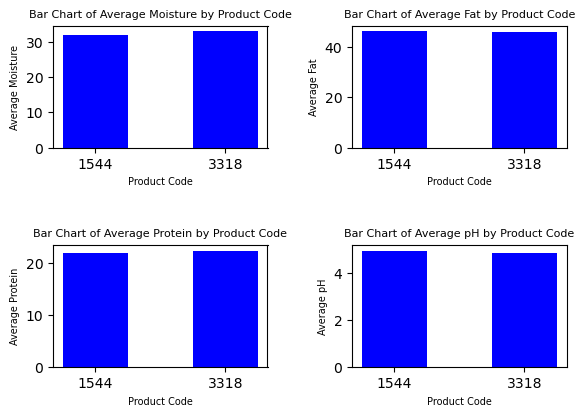

In [11]:
fig, axes = plt.subplots(nrows = 2, ncols = 2) #setting the subplot shape, 2x2

# axes[0, 0] to specify upper left plot
axes[0, 0].bar(chemdf["Resource"], chemdf["Moisture %"], color ='blue', width = 0.5) #bar chart, x=Resource, y=Moisture, color blue, width of bars 0.5
axes[0, 0].set_xlabel("Product Code", fontsize=7) #setting x label and font size
axes[0, 0].set_ylabel("Average Moisture", fontsize=7) #setting y label and font size
axes[0, 0].set_title("Bar Chart of Average Moisture by Product Code", fontsize=8) #setting title and font size

# axes[0, 1] to specify upper right plot
axes[0, 1].bar(chemdf["Resource"], chemdf["Fat %"], color ='blue', width = 0.5) #bar chart, x=Resource, y=Fat, color blue, width of bars 0.5
axes[0, 1].set_xlabel("Product Code", fontsize=7) #setting x label and font size
axes[0, 1].set_ylabel("Average Fat", fontsize=7) #setting y label and font size
axes[0, 1].set_title("Bar Chart of Average Fat by Product Code", fontsize=8) #setting title and font size

# axes[1, 0] to specify lower left plot
axes[1, 0].bar(chemdf["Resource"], chemdf["Protein %"], color ='blue', width = 0.5) #bar chart, x=Resource, y=protein, color blue, width of bars 0.5
axes[1, 0].set_xlabel("Product Code", fontsize=7) #setting x label and font size
axes[1, 0].set_ylabel("Average Protein", fontsize=7) #setting y label and font size
axes[1, 0].set_title("Bar Chart of Average Protein by Product Code", fontsize=8) #setting title and font size

# axes[1, 1] to specify lower right plot
axes[1, 1].bar(chemdf["Resource"], chemdf["pH"], color ='blue', width = 0.5) #bar chart, x=Resource, y=pH, color blue, width of bars 0.5
axes[1, 1].set_xlabel("Product Code", fontsize=7) #setting x label and font size
axes[1, 1].set_ylabel("Average pH", fontsize=7) #setting y label and font size
axes[1, 1].set_title("Bar Chart of Average pH by Product Code", fontsize=8) #setting title and font size

fig.tight_layout(pad=3.0) #using tight_layout with pad set to 3.0 to create spacing between subplots
plt.show() #call to show the plots

Overall, these plots show there does not appear to be large differences in the average chemical results between the two products. I believe I am safe to continue with the combined data and treating the results as one. 

Next, I would like to get a feel for if there is any potential correlation between the different chemical results and the target fat values. 

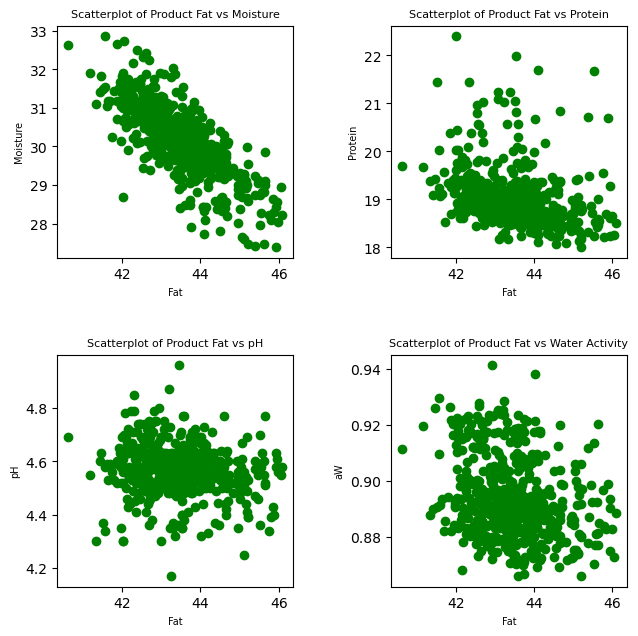

In [12]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(7, 7)) #setting the subplot shape, 2x2, figsize to set size of plots

axes[0, 0].scatter(chemdf["Fat %"], chemdf["Moisture %"], color="green") #scatter chart, x=Fat, y=Moisture, color green
axes[0, 0].set_xlabel("Fat", fontsize=7) #setting x label and font size
axes[0, 0].set_ylabel("Moisture", fontsize=7) #setting y label and font size
axes[0, 0].set_title("Scatterplot of Product Fat vs Moisture", fontsize=8) #setting title and font size

axes[0, 1].scatter(chemdf["Fat %"], chemdf["Protein %"], color ='green') #scatter chart, x=Fat, y=Protein, color green
axes[0, 1].set_xlabel("Fat", fontsize=7) #setting x label and font size
axes[0, 1].set_ylabel("Protein", fontsize=7) #setting y label and font size
axes[0, 1].set_title("Scatterplot of Product Fat vs Protein", fontsize=8) #setting title and font size

axes[1, 0].scatter(chemdf["Fat %"], chemdf["pH"], color ='green') #scatter chart, x=Fat, y=pH, color green
axes[1, 0].set_xlabel("Fat", fontsize=7) #setting x label and font size
axes[1, 0].set_ylabel("pH", fontsize=7) #setting y label and font size
axes[1, 0].set_title("Scatterplot of Product Fat vs pH", fontsize=8) #setting title and font size

axes[1, 1].scatter(chemdf["Fat %"], chemdf["aW"], color ='green') #scatter chart, x=Fat, y=aW, color green
axes[1, 1].set_xlabel("Fat", fontsize=7) #setting x label and font size
axes[1, 1].set_ylabel("aW", fontsize=7) #setting y label and font size
axes[1, 1].set_title("Scatterplot of Product Fat vs Water Activity", fontsize=8) #setting title and font size

fig.tight_layout(pad=3.0) #using tight_layout with pad set to 3.0 to create spacing between subplots
plt.show() #call to show the plots

These scatter plots show that there is likely some correlation between the fat and other results. This is especially true between fat and moisture and protein. There appears to be much less correlation between fat and pH and water activity. I will be keeping this in mind during model development in future steps. 

Overall, I now have a good understanding of the makeup and statistics of my dataset and it appears to be fairly clean and ready for further analysis. Also, there appears to be some correlation between my target data variable and other variables in the dataset, which should help with model creation in future steps. 

## Part 2

As I continue on to prepare the data for model analysis, I am going to start by removing some columns of data that will not be useful in the model. 

In [13]:
chemdf2 = chemdf.drop(['RecordNumber', 'Unnamed: 4', 'WIP Number', 'Julian Date', 'Pallet Numbers', 'MPR', 'aW'], axis=1)

In [14]:
chemdf2.head(3)

,Date,Time,Resource,Shift,Moisture %,Protein %,Fat %,Salt %,pH
0,4/18/2024,9:33,1544,1,30.43,18.74,44.23,4.67,4.50
1,4/18/2024,13:09,1544,1,29.11,18.14,45.15,4.10,4.54
2,4/18/2024,13:10,1544,1,29.32,18.09,44.81,4.58,4.52


I dropped 'RecordNumber', 'Unnamed: 4', and 'Pallet Numbers' because I know these are just arbitrary datapoints that cannot have any affect on the chemistry results. I also dropped 'WIP Number', 'Julian Date', and 'MPR' because these are essentially duplicate information - the same information is available in slightly different formats through other parameters. Lastly, I am choosing to drop 'aW' because the chart in the previous section shows that there is virtually no useful correlation with this parameter; my experience also confirms that this is likely true. 

Looking at the summary statistics for the dataframe, there does not appear to be any outliers in the numerical data. 

I talked in Part 1 about creating a model to be able to predict fat levels in certain ranges. If I bin all my chemistry data and label the bins with specific label names, my data will become categorical and I can predict certain fat categories based on others. 

In [15]:
m_bins = [0, 28, 30, 35] #moisture bin variable
m_labels = ["m1", "m2", "m3"] #labels for moisture bins
p_bins = [0, 19, 21, 24] #protein bin variable
p_labels = ["p1", "p2", "p3"] #labels for protein bins
s_bins = [0, 2.9, 3.4, 3.9, 4.4, 5] #salt bin variable
s_labels = ["s1", "s2", "s3", "s4", "s5"] #labels for salt bins
ph_bins = [0, 4, 4.5, 4.75, 5] #pH bin variable
ph_labels = ["ph1", "ph2", "ph3", "ph4"] #labels for pH bins
f_bins = [0, 42, 44, 46, 48] #fat bin variable
f_labels = ["f1", "f2", "f3", "f4"] #labels for fat bins

In [16]:
#using pandas cut to create new moisture_binned column with the labels of the bins
chemdf2['moisture_binned'] = pd.cut(chemdf2['Moisture %'], bins=m_bins, labels=m_labels)

In [17]:
#using pandas cut to create new protein_binned column with the labels of the bins
chemdf2['protein_binned'] = pd.cut(chemdf2['Protein %'], bins=p_bins, labels=p_labels)

In [18]:
#using pandas cut to create new salt_binned column with the labels of the bins
chemdf2['salt_binned'] = pd.cut(chemdf2['Salt %'], bins=s_bins, labels=s_labels)

In [19]:
#using pandas cut to create new pH_binned column with the labels of the bins
chemdf2['pH_binned'] = pd.cut(chemdf2['pH'], bins=ph_bins, labels=ph_labels)

In [20]:
#using pandas cut to create new fat_binned column with the labels of the bins
chemdf2['fat_binned'] = pd.cut(chemdf2['Fat %'], bins=f_bins, labels=f_labels)

In [21]:
chemdf2.head(20)

,Date,Time,Resource,Shift,Moisture %,Protein %,Fat %,Salt %,pH,moisture_binned,protein_binned,salt_binned,pH_binned,fat_binned
0,4/18/2024,9:33,1544,1,30.43,18.74,44.23,4.67,4.50,m3,p1,s5,ph2,f3
1,4/18/2024,13:09,1544,1,29.11,18.14,45.15,4.10,4.54,m2,p1,s4,ph3,f3
2,4/18/2024,13:10,1544,1,29.32,18.09,44.81,4.58,4.52,m2,p1,s5,ph3,f3
3,4/18/2024,21:11,3318,2,31.49,19.61,42.00,3.31,4.69,m3,p2,s2,ph3,f1
4,4/18/2024,21:12,3318,2,30.99,19.00,42.55,3.61,4.69,m3,p1,s3,ph3,f2
5,4/18/2024,21:13,3318,2,31.62,19.39,42.14,3.33,4.65,m3,p2,s2,ph3,f2
6,4/18/2024,21:14,3318,2,31.42,19.32,42.06,3.35,4.69,m3,p2,s2,ph3,f2
7,4/19/2024,14:20,1544,1,29.78,18.33,43.26,4.36,4.57,m2,p1,s4,ph3,f2
8,4/19/2024,14:21,1544,1,29.82,18.33,44.07,4.45,4.57,m2,p1,s5,ph3,f3
9,4/19/2024,14:24,1544,1,28.75,18.98,44.97,4.38,4.56,m2,p1,s4,ph3,f3


As of right now, I only plan to use the binned data for my model creation, so I will copy these into a new dataframe. However, I will keep all the previous data in the previous dataframe. 

In [22]:
#creating new dataframe by using copy() on the previous dataframe and calling the desired columns
chemdf3 = chemdf2[['moisture_binned', 'protein_binned', 'salt_binned', 'pH_binned', 'fat_binned']].copy()

In [23]:
chemdf3.head(5)

,moisture_binned,protein_binned,salt_binned,pH_binned,fat_binned
0,m3,p1,s5,ph2,f3
1,m2,p1,s4,ph3,f3
2,m2,p1,s5,ph3,f3
3,m3,p2,s2,ph3,f1
4,m3,p1,s3,ph3,f2


### Part 3

First an update based on feedback from Part 2. I am choosing to bin my data because I feel like in the application of the model, it will be easier in my job to look at or look for data that falls in certain testing ranges rather than specific values. For example, if I know a certain moisture result range yields a certain fat result range, we might be able to adjust the overall formula to a certain range. 

My first step in Part 3 is to create dummy variables for my binned data so I can run a logistic regression model. 

In [36]:
# creating new df by calling get_dummies on previous df calling the 4 columns by name, but not the intended test column
chemdf4 = pd.get_dummies(chemdf3, prefix=['moisture_binned', 'protein_binned', 'salt_binned', 'pH_binned'], columns=['moisture_binned', 'protein_binned', 'salt_binned', 'pH_binned'])

In [37]:
chemdf4.head(2)

,fat_binned,moisture_binned_m1,moisture_binned_m2,moisture_binned_m3,protein_binned_p1,protein_binned_p2,protein_binned_p3,salt_binned_s1,salt_binned_s2,salt_binned_s3,salt_binned_s4,salt_binned_s5,pH_binned_ph1,pH_binned_ph2,pH_binned_ph3,pH_binned_ph4
0,f3,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0
1,f3,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0


In [40]:
# creating a new df by calling replace on the previous df 4 times with the specified value in the column and the numeric value to replace it
chemdf5 = chemdf4.replace({'fat_binned': 'f1'}, 0).replace({'fat_binned': 'f2'}, 1).replace({'fat_binned': 'f3'}, 2).replace({'fat_binned': 'f4'}, 3)

In [42]:
chemdf5.head(5)

,fat_binned,moisture_binned_m1,moisture_binned_m2,moisture_binned_m3,protein_binned_p1,protein_binned_p2,protein_binned_p3,salt_binned_s1,salt_binned_s2,salt_binned_s3,salt_binned_s4,salt_binned_s5,pH_binned_ph1,pH_binned_ph2,pH_binned_ph3,pH_binned_ph4
0,2,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0
1,2,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0
2,2,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0
3,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0
4,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0


In [24]:
from sklearn.model_selection import train_test_split #importing tool to split dataset into test and train data

In [25]:
from sklearn.linear_model import LogisticRegression #importing logistic regression model library

In [43]:
X = chemdf4.drop(['fat_binned'], axis = 1) # selecting X values (comparisons) calling for entire df except dropping (drop) the fat_binned column which is the target
y = chemdf4['fat_binned'] # selecting the y values (target) calling for fat_binned column

In [44]:
# format for creating test and train data from X and y values, using train_test_split function, test_size of 0.2 is 20% test, random_state to control
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

I am choosing to run a multinomial logistic regression model on my data because my data has been transformed into categorical and there are multiple class options in my dataset. 

In [45]:
logregressor = LogisticRegression(multi_class='multinomial', solver='lbfgs') #creating regressor variable to run the logistic regression function, with multi_class to multinomial and the lbfgs solver which works on multinomial log regression
logregressor.fit(X_train, y_train) # using fit to train the data

LogisticRegression(multi_class='multinomial')

In [46]:
y_pred = logregressor.predict(X_test) #running the log regression on test matrix to create y_pred variable

In [50]:
#importing confusion matrix and plotting libraries
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
labels = ['f1', 'f2', 'f3', 'f4'] #creating labels variable to use for labeling the confusion matrix

In [65]:
matrix = confusion_matrix(y_test, y_pred) #creating matrix variable with the confusion_matrix function on the target test data and y_pred data

In [66]:
#creating dataframe for the confusion matrix with the matrix variable
cmdataframe = pd.DataFrame(matrix)

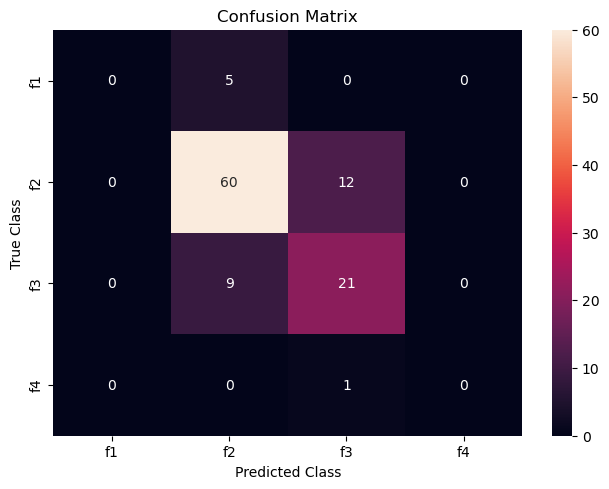

In [67]:
#sns.heatmap function to create cm, annot=True for labels, specifying xtick and yticklabels
sns.heatmap(cmdataframe, annot=True, xticklabels=labels, yticklabels=labels) 
plt.title('Confusion Matrix'), plt.tight_layout() #plot title
plt.ylabel('True Class'), plt.xlabel('Predicted Class') #x label and y label
plt.show() #show the plot

In [68]:
from sklearn.metrics import accuracy_score

In [69]:
accuracy_score(y_test, y_pred)

0.75

I was hoping for a higher accuracy score closer to 1.0. And the confusion matrix is showing some moderate results in the middle ranges of the values, but it is not working well in the high and low end.  I will try some feature selection to attempt to find the best features to build the model with. 

#### Feature selection

In [71]:
#importing chi squared and kbest libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif

In [76]:
chi2_selector = SelectKBest(chi2, k=5) #creating chi2_selector variable which runs the SelectKBest chi2 function with k=5 features

In [77]:
features_kbest = chi2_selector.fit_transform(X, y) #creating features_kbest variable which fits and transforms the feature and target data with the chi2 selector

In [78]:
#creating cols_idxs variable which calls get_support function on the chi2_selector variable
cols_idxs = chi2_selector.get_support(indices=False)
fivefeaturesdf = X.iloc[:, cols_idxs] #creating new dataframe with the 5 selected features, X2 features and iloc to locate them

In [79]:
fivefeaturesdf

,moisture_binned_m1,moisture_binned_m2,moisture_binned_m3,protein_binned_p1,protein_binned_p2
0,0,0,1,1,0
1,0,1,0,1,0
2,0,1,0,1,0
3,0,0,1,0,1
4,0,0,1,1,0
...,...,...,...,...,...
532,0,0,1,1,0
533,0,0,1,1,0
534,0,1,0,1,0
535,0,0,1,1,0


In [80]:
#re-doing the X and y value selections with just the selected 5 columns
X2 = chemdf5[['moisture_binned_m1', 'moisture_binned_m2', 'moisture_binned_m3', 'protein_binned_p1', 'protein_binned_p2']] # selecting X values (comparisons) calling for the 5 previous selected columns
y2 = chemdf5['fat_binned'] # selecting the y values (target) calling for fat_binned column

In [81]:
# format for creating test and train data from X and y values, using train_test_split function, test_size of 0.2 is 20% test
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2)

In [82]:
logregressor2 = LogisticRegression(multi_class='multinomial', solver='lbfgs') #creating regressor variable to run the linear regression function
logregressor2.fit(X2_train, y2_train) # using fit to train the data

LogisticRegression(multi_class='multinomial')

In [83]:
y_pred2 = logregressor2.predict(X2_test) #running the log regression on test matrix to create y_pred variable

In [85]:
accuracy_score(y2_test, y_pred2)

0.7407407407407407

The accuracy score with the best features does not appear any better than the original. 

#### Numeric features/binned data

I am going to pivot to using the numeric values for the features and stay with the binned target data. 

In [91]:
chemdf6 = chemdf2[['Moisture %', 'Protein %', 'Salt %', 'pH', 'fat_binned']].copy()

In [92]:
chemdf7 = chemdf6.replace({'fat_binned': 'f1'}, 0).replace({'fat_binned': 'f2'}, 1).replace({'fat_binned': 'f3'}, 2).replace({'fat_binned': 'f4'}, 3)

In [127]:
chemdf7.head(3)

,Moisture %,Protein %,Salt %,pH,fat_binned
0,30.43,18.74,4.67,4.50,2
1,29.11,18.14,4.10,4.54,2
2,29.32,18.09,4.58,4.52,2


In [94]:
# re-running the original model with the latest dataframe
X = chemdf7.drop(['fat_binned'], axis = 1) # selecting X values (comparisons) calling for entire df except dropping (drop) the fat_binned column which is the target
y = chemdf7['fat_binned'] # selecting the y values (target) calling for fat_binned column

In [95]:
# format for creating test and train data from X and y values, using train_test_split function, test_size of 0.2 is 20% test, random_state to control
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [100]:
#importing preprocessing library
from sklearn import preprocessing

In [101]:
#creating minmax_scale variable which applies the preprocessing MinMaxScaler function with a feature_range (lower, higher) of 0-1
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1)) 

In [102]:
#creating scaled_feature variable which applies the minmax_scale to the train features (x_train)
scaled_features = minmax_scale.fit_transform(X_train)

In [105]:
#creating scaled_test variable which applies the minmax_scale to the test features (x_test)
scaled_test = minmax_scale.transform(X_test)

In [103]:
logregressor = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500) #creating regressor variable to run the logisitc regression function
logregressor.fit(scaled_features, y_train) # using fit to train the data

LogisticRegression(max_iter=500, multi_class='multinomial')

In [106]:
y_pred = logregressor.predict(scaled_test) #running the log regression on scaled test matrix to create y_pred variable

In [108]:
from sklearn.model_selection import cross_val_score #importing cross_val_score library

In [118]:
#running cross_val_score on logregressor model, test_feature_matrix test data, target test data, calling for precision
cross_val_score(logregressor, scaled_features, y_train, scoring='accuracy')

C:\Users\ryanr\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


array([0.77906977, 0.81395349, 0.75581395, 0.76744186, 0.81176471])

In [119]:
matrix2 = confusion_matrix(y_test, y_pred) #creating matrix variable with the confusion_matrix function on the target test data and y_pred data

In [120]:
#creating dataframe for the confusion matrix with the matrix variable
cmdataframe2 = pd.DataFrame(matrix2)

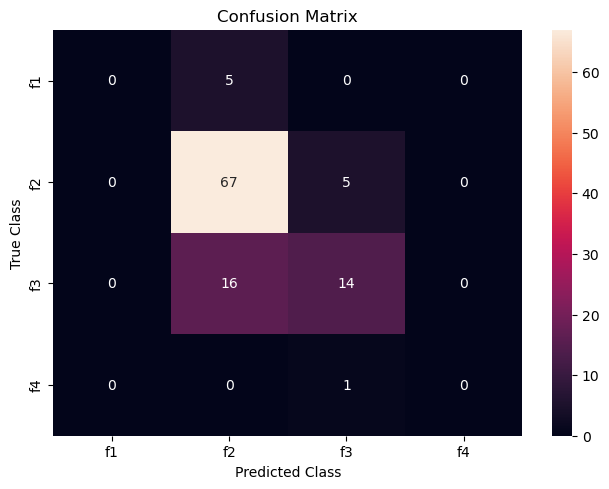

In [121]:
#sns.heatmap function to create cm, annot=True for labels, specifying xtick and yticklabels
sns.heatmap(cmdataframe2, annot=True, xticklabels=labels, yticklabels=labels) 
plt.title('Confusion Matrix'), plt.tight_layout() #plot title
plt.ylabel('True Class'), plt.xlabel('Predicted Class') #x label and y label
plt.show() #show the plot

In [126]:
#running cross_val_score on logregressor model, test_feature_matrix test data, target test data, calling for precision
cross_val_score(logregressor, scaled_features, y_train, scoring='neg_mean_squared_error')

C:\Users\ryanr\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


array([-0.22093023, -0.18604651, -0.24418605, -0.23255814, -0.18823529])

In [123]:
#running cross_val_score on logregressor model, test_feature_matrix test data, target test data, calling for precision
cross_val_score(logregressor, scaled_features, y_train, scoring='r2')

C:\Users\ryanr\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


array([0.14539749, 0.28033473, 0.05543933, 0.16220166, 0.25925926])

Overall, the accuracy with this model version is slightly better, but overall doesn't seem to predict any better and does not have very high negative MSE or R2 values indicating a good model. 

The confusion matrix shows that there is not good prediction at the high and low ends and I am assuming this is due to how I binned the data. I think I will pivot again and move away from using binned data. I recognize that there still will be predictive benefits with such a model, even if I can't target a certain range. 

#### All numeric data

In [128]:
chemdf8 = chemdf2[['Moisture %', 'Protein %', 'Salt %', 'pH', 'Fat %']].copy()

In [129]:
chemdf8.head(3)

,Moisture %,Protein %,Salt %,pH,Fat %
0,30.43,18.74,4.67,4.50,44.23
1,29.11,18.14,4.10,4.54,45.15
2,29.32,18.09,4.58,4.52,44.81


In [130]:
from sklearn.linear_model import LinearRegression #importing linear regression model library

In [131]:
X3 = chemdf8.drop(['Fat %'], axis = 1) # selecting X values (comparisons) calling for entire df except dropping (drop) the fat column which is the target
y3 = chemdf8['Fat %'] # selecting the y values (target) calling for fat column

In [142]:
# format for creating test and train data from X and y values, using train_test_split function, test_size of 0.2 is 20% test, random_state to control
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.2, random_state = 0)

In [143]:
regressor = LinearRegression() #creating regressor variable to run the linear regression function
regressor.fit(X3_train, y3_train) # using fit to train the data

LinearRegression()

In [144]:
y_pred3 = regressor.predict(X3_test) #creating y_pred3 variable which uses predict to predict the test results based on the model

In [145]:
# importing librarys to calculate model evaluation metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_error as mae

In [146]:
print("r2 score:", r2_score(y3_test, y_pred3)) #using r2_score function on test and predicted values
rmselinear = sqrt(mean_squared_error(y_pred3, y3_test)) #calculating sq rt of mse on test and predicted values
print("RMSE score:",rmselinear)
maelinear = mae(y3_test, y_pred3) #using mae function on test and predicted values
print("MAE score:",maelinear)

r2 score: 0.509721690808941
RMSE score: 0.6742604768450113
MAE score: 0.5061398672020454


Overall, these metrics are not showing this to be a great model neither. The r2 value is not very high, so predictions are not going to be very good and the RMSE and MAE scores are fairly high, showing there will be at least moderate errors in the predicted versus actual values. 

Next, I am going to remove the pH results from my dataset. Based on my knowledge, the pH value is not necessarily determined by the formula of the product like the other features, and these value are logarithmic, so there is a chance that this is negatively affecting my model. The scatterplot I created in Part 1 also showed that there is not much if any correlation between pH and fat. 

#### Removing pH feature

In [138]:
chemdf9 = chemdf8.drop('pH', axis=1)

In [139]:
chemdf9.head(2)

,Moisture %,Protein %,Salt %,Fat %
0,30.43,18.74,4.67,44.23
1,29.11,18.14,4.10,45.15


In [140]:
X4 = chemdf9.drop(['Fat %'], axis = 1) # selecting X values (comparisons) calling for entire df except dropping (drop) the fat column which is the target
y4 = chemdf9['Fat %'] # selecting the y values (target) calling for fat column

In [147]:
# format for creating test and train data from X and y values, using train_test_split function, test_size of 0.2 is 20% test, random_state to control
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size = 0.2, random_state = 0)

In [148]:
regressor = LinearRegression() #creating regressor variable to run the linear regression function
regressor.fit(X4_train, y4_train) # using fit to train the data

LinearRegression()

In [149]:
y_pred4 = regressor.predict(X4_test) #creating y_pred3 variable which uses predict to predict the test results based on the model

In [150]:
print("r2 score:", r2_score(y4_test, y_pred4)) #using r2_score function on test and predicted values
rmselinear = sqrt(mean_squared_error(y_pred4, y4_test)) #calculating sq rt of mse on test and predicted values
print("RMSE score:",rmselinear)
maelinear = mae(y4_test, y_pred4) #using mae function on test and predicted values
print("MAE score:",maelinear)

r2 score: 0.5199245485405328
RMSE score: 0.6672077972867357
MAE score: 0.506952357561505


This change resulted in a very slight change for the better in the model prediction metrics, but overall not significantly. 

At this time, I feel like I have exhausted the different options for creating a useful model for this dataset. I attempted to use logistic regression on dummy variables of my binned data, used feature selection to choose the best feature options, readjusting my dataset to both a combination of binned and non-binned data and then used linear regression on two versions of all numeric datasets. In the end, I believe that all the models I created will only be moderately good at prediction. 

I believe the main reason for my unsuccessfulness is my data itself. I might have chosen a dataset that is too small or maybe has too much human error that is not obviously noticeable. 